In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(scaled=False)

In [6]:
import pandas as pd
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [7]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0


In [8]:
df.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

In [9]:
missing_mask = df.isna()
print(missing_mask)

       age    sex    bmi     bp     s1     s2     s3     s4     s5     s6
0    False  False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
437  False  False  False  False  False  False  False  False  False  False
438  False  False  False  False  False  False  False  False  False  False
439  False  False  False  False  False  False  False  False  False  False
440  False  False  False  False  False  False  False  False  False  False
441  False  False  False  False  False  False  False  False  False  False

[442 rows x 10 columns]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [11]:
df_normalized = (df - df.min()) / (df.max() - df.min())

df_normalized.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (95% training, 5% testing)
X_train, X_test= train_test_split(df_normalized,test_size=0.05,random_state=42)


In [13]:
# Print the sizes of the resulting subsets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 419
Testing set size: 23


In [14]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    
    return np.mean((y_true - y_pred) ** 2)


In [15]:
def mean_absolute_error(y_true, y_pred):
   
    return np.mean(np.abs(y_true - y_pred))


In [16]:
def root_mean_squared_error(y_true, y_pred):
    
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [33]:
def r_squared_score(y_true, y_pred):
    
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2




In [20]:
from sklearn.linear_model import LinearRegression


# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)



# Initialize a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(y_pred)



[142.49866563 177.09407824 134.37196172 287.36457072 123.13565646
  96.69102812 255.85636963 183.84133677  91.41356874 110.88961879
  98.0958209  165.46390557  57.50541254 204.93543776 100.38165837
 129.60028301 217.67009936 246.36860994 192.34830902 214.83086701
 208.18960765  89.68248093  73.88571835]


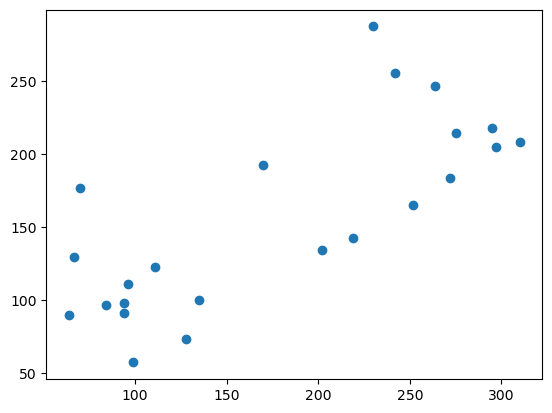

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

In [22]:
mse = mean_squared_error(y_test, y_pred)
mse

3516.1108664162243

In [24]:
mae =  mean_absolute_error(y_test, y_pred)
mae

49.27832027864407

In [25]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

59.29680317197736

In [27]:
r2 = r_squared_score(y_test, y_pred)
r2

0.5163792932946589

In [28]:
y_pred2 = model.predict(X_train)

In [29]:
mse2 = mean_squared_error(y_train, y_pred2)
mse2

2831.2195263878284

In [30]:
mae2 =  mean_absolute_error(y_train, y_pred2)
mae2

42.96383748248952

In [31]:
rmse2 = root_mean_squared_error(y_train, y_pred2)
rmse2

53.20920527867174

In [32]:
r22 = r_squared_score(y_train, y_pred2)
r22

0.513588025768511

In [36]:
import statsmodels.api as sm

In [38]:
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     43.08
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           7.57e-58
Time:                        14:40:16   Log-Likelihood:                -2259.7
No. Observations:                 419   AIC:                             4541.
Df Residuals:                     408   BIC:                             4586.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.0749      2.635     57.329      0.0

# Questions

1) The errors in this table for the training data are less than the test data. Because the model is built based on the training data and it is normal to have the least amount of error for this data

2) R² measures the proportion of variance in the dependent variable (target) that is explained by the independent variables (features) in the regression model.It ranges from 0 to 1.Higher R² values suggest that the model captures more of the variability in the data. Adjusted R² addresses the limitations of R² by penalizing the inclusion of unnecessary features.It adjusts R² based on the number of predictors (features) in the model. A high R² suggests that the model explains a large portion of the variance. A high Adjusted R² indicates a good balance between model fit and complexity.

3) If the p value is less than 0.05, it means that variable has a high statistical impact in the regression model, and if this value is greater than 0.05, it means that it does not have a great impact in the model.

4) The top features with the largest absolute coefficients (S3, BMI, S5, BP, S4) are most important in predicting diabetic condition.
Features like age, sex, and S1 have smaller absolute coefficients, indicating less impact.